In [1]:
%load_ext autoreload
%autoreload 2

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
import torch.optim as optim
from torchvision import transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt
import os

from utils.model_utils import read_csv_data, CustomDataset, Training, Validation, Train_Validation, TransferLearning, Testing, create_benchmark_model

In [76]:
train_df, val_df, test_df = read_csv_data("./data/all/data.csv")

In [4]:
train_df.head()

,path,borough,id,longitude,latitude
34833,./data/all/Brooklyn/540593097940529.jpg,Brooklyn,540593097940529,-74.000262,40.686706
3363,./data/all/Queens/479092496643392.jpg,Queens,479092496643392,-73.890907,40.744101
8144,./data/all/Manhattan/1674814212725568.jpg,Manhattan,1674814212725568,-73.997128,40.718161
13877,./data/all/Queens/3930874653663554.jpg,Queens,3930874653663554,-73.899627,40.755486
14423,./data/all/Queens/3051687035117658.jpg,Queens,3051687035117658,-73.802140,40.669092


In [5]:
train_set = CustomDataset(train_df)
val_set = CustomDataset(val_df)
test_set = CustomDataset(test_df)

/home/florsanders/Code/columbia_university/deep_learning_for_computer_vision/project/utils/model_utils.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  path = df.iloc[index][0]
/home/florsanders/Code/columbia_university/deep_learning_for_computer_vision/project/utils/model_utils.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  category = df.iloc[index][1]


In [6]:
train_loader = DataLoader(train_set, batch_size=100, shuffle=True)
val_loader = DataLoader(val_set, batch_size=100, shuffle=False)
test_loader = DataLoader(test_set, batch_size=100, shuffle=False)

#### DON'T USE THIS (RESNET18)

In [12]:
from torchvision.models import resnet18, ResNet18_Weights
weights = ResNet18_Weights.IMAGENET1K_V1
transforms = weights.transforms(antialias=True) # This transformation automatically converts the input data to the expected format
model = resnet18(weights=weights)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/florsanders/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:07<00:00, 6.29MB/s]


In [14]:
TransferLearning(model, transforms, train_loader, val_loader)

Epoch 1
-------------------------------


KeyboardInterrupt: 

In [ ]:
model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

model.load_state_dict(torch.load('model_weights.pth'))
Train_Validation(model, transforms, train_loader, val_loader, 5, loss_fn, optimizer)

Epoch 1
-------------------------------
Training Loss: 1.263591
Validation Loss: 1.269236 
Validation Accuracy: 46.8% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 1.245259
Validation Loss: 1.262386 
Validation Accuracy: 47.5% (Model Checkpoint)

Epoch 3
-------------------------------
Training Loss: 1.233597
Validation Loss: 1.243374 
Validation Accuracy: 47.4% (Model Checkpoint)

Epoch 4
-------------------------------
Training Loss: 1.223313
Validation Loss: 1.248396 
Validation Accuracy: 47.6%

Epoch 5
-------------------------------
Training Loss: 1.220949
Validation Loss: 1.237212 
Validation Accuracy: 47.5% (Model Checkpoint)

Training Done!


In [ ]:
model.load_state_dict(torch.load('model_weights.pth'))
for param in model.parameters():
  param.requires_grad = True

Train_Validation(model, transforms, train_loader, val_loader, 5, loss_fn, optimizer)

Epoch 1
-------------------------------
Training Loss: 1.138963
Validation Loss: 1.105708 
Validation Accuracy: 54.5% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 0.949500
Validation Loss: 1.034358 
Validation Accuracy: 57.9% (Model Checkpoint)

Epoch 3
-------------------------------
Training Loss: 0.802019
Validation Loss: 1.008202 
Validation Accuracy: 60.1% (Model Checkpoint)

Epoch 4
-------------------------------
Training Loss: 0.651941
Validation Loss: 1.036918 
Validation Accuracy: 60.2%

Epoch 5
-------------------------------
Training Loss: 0.487497
Validation Loss: 1.055736 
Validation Accuracy: 61.1%

Training Done!


#### USE THIS (RESNET18)


In [49]:
from torchvision.models import resnet18, ResNet18_Weights
weights = ResNet18_Weights.IMAGENET1K_V1
transforms = weights.transforms(antialias=True)
model = resnet18(weights=weights)

In [50]:
TransferLearning(model, transforms, train_loader, val_loader, 0.01, 5, replace = True, tune = True, name = 'resnet18')

Epoch 1
-------------------------------
Training Loss: 1.272441
Validation Loss: 1.154861 
Validation Accuracy: 52.7% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 1.054070
Validation Loss: 1.062836 
Validation Accuracy: 56.1% (Model Checkpoint)

Epoch 3
-------------------------------
Training Loss: 0.909423
Validation Loss: 1.026487 
Validation Accuracy: 57.2% (Model Checkpoint)

Epoch 4
-------------------------------
Training Loss: 0.769626
Validation Loss: 1.033037 
Validation Accuracy: 59.2%

Epoch 5
-------------------------------
Training Loss: 0.613260
Validation Loss: 1.067779 
Validation Accuracy: 58.0%

Training Done!


#### DON'T USE THIS (REGNET)


In [37]:
from torchvision.models import regnet_y_1_6gf, RegNet_Y_1_6GF_Weights
weights = RegNet_Y_1_6GF_Weights.IMAGENET1K_V1
transforms = weights.transforms(antialias=True)
model = regnet_y_1_6gf(weights=weights)

In [ ]:
TransferLearning(model, transforms, train_loader, val_loader)

Epoch 1
-------------------------------
Training Loss: 1.506023
Validation Loss: 1.481848 
Validation Accuracy: 35.9% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 1.449909
Validation Loss: 1.439118 
Validation Accuracy: 37.3% (Model Checkpoint)

Epoch 3
-------------------------------
Training Loss: 1.410691
Validation Loss: 1.406500 
Validation Accuracy: 40.6% (Model Checkpoint)

Epoch 4
-------------------------------
Training Loss: 1.381541
Validation Loss: 1.379590 
Validation Accuracy: 41.5% (Model Checkpoint)

Epoch 5
-------------------------------
Training Loss: 1.359076
Validation Loss: 1.360394 
Validation Accuracy: 42.8% (Model Checkpoint)

Epoch 6
-------------------------------
Training Loss: 1.341741
Validation Loss: 1.346099 
Validation Accuracy: 43.5% (Model Checkpoint)

Epoch 7
-------------------------------
Training Loss: 1.325929
Validation Loss: 1.333329 
Validation Accuracy: 44.2% (Model Checkpoint)

Epoch 8
--------------------------

#### USE THIS (REGNET)


In [17]:
from torchvision.models import regnet_y_1_6gf, RegNet_Y_1_6GF_Weights
weights = RegNet_Y_1_6GF_Weights.IMAGENET1K_V1
transforms = weights.transforms(antialias=True)
model = regnet_y_1_6gf(weights=weights)

In [18]:
TransferLearning(model, transforms, train_loader, val_loader, 0.01, 5, replace = True, tune = True, name = 'regnet')

Epoch 1
-------------------------------
Training Loss: 1.320482
Validation Loss: 1.204859 
Validation Accuracy: 50.2% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 1.118347
Validation Loss: 1.105229 
Validation Accuracy: 54.2% (Model Checkpoint)

Epoch 3
-------------------------------
Training Loss: 0.997433
Validation Loss: 1.057483 
Validation Accuracy: 57.0% (Model Checkpoint)

Epoch 4
-------------------------------
Training Loss: 0.886158
Validation Loss: 1.034785 
Validation Accuracy: 57.7% (Model Checkpoint)

Epoch 5
-------------------------------
Training Loss: 0.768380
Validation Loss: 1.019936 
Validation Accuracy: 59.4% (Model Checkpoint)

Training Done!


#### DON'T USE THIS (RESNET50)


In [25]:
from torchvision.models import resnet50, ResNet50_Weights
weights = ResNet50_Weights.IMAGENET1K_V1
transforms = weights.transforms(antialias=True)
model = resnet50(weights=weights)

In [16]:
TransferLearning(model, transforms, train_loader, val_loader, 0.01, 10, False)

Epoch 1
-------------------------------
Training Loss: 1.366665
Validation Loss: 1.300190 
Validation Accuracy: 45.5% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 1.270463
Validation Loss: 1.279088 
Validation Accuracy: 45.9% (Model Checkpoint)

Epoch 3
-------------------------------
Training Loss: 1.241528
Validation Loss: 1.256992 
Validation Accuracy: 47.8% (Model Checkpoint)

Epoch 4
-------------------------------
Training Loss: 1.225265
Validation Loss: 1.317671 
Validation Accuracy: 44.2%

Epoch 5
-------------------------------
Training Loss: 1.214852
Validation Loss: 1.228601 
Validation Accuracy: 48.0% (Model Checkpoint)

Epoch 6
-------------------------------
Training Loss: 1.208872
Validation Loss: 1.218207 
Validation Accuracy: 49.2% (Model Checkpoint)

Epoch 7
-------------------------------
Training Loss: 1.202330
Validation Loss: 1.220219 
Validation Accuracy: 48.8%

Epoch 8
-------------------------------
Training Loss: 1.194185
Validati

In [17]:
model.load_state_dict(torch.load('model_weights_resnet50.pth'))
TransferLearning(model, transforms, train_loader, val_loader, 0.01, 5, True)

Epoch 1
-------------------------------
Training Loss: 1.093184
Validation Loss: 1.034265 
Validation Accuracy: 58.0% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 0.830421
Validation Loss: 0.993607 
Validation Accuracy: 60.3% (Model Checkpoint)

Epoch 3
-------------------------------
Training Loss: 0.578699
Validation Loss: 1.006183 
Validation Accuracy: 62.5%

Epoch 4
-------------------------------
Training Loss: 0.289185
Validation Loss: 1.185670 
Validation Accuracy: 60.3%

Epoch 5
-------------------------------
Training Loss: 0.088274
Validation Loss: 1.352074 
Validation Accuracy: 61.6%

Training Done!


#### USE THIS (RESNET50)


In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
weights = ResNet50_Weights.IMAGENET1K_V1
transforms = weights.transforms(antialias=True)
model = resnet50(weights=weights)

In [20]:
TransferLearning(model, transforms, train_loader, val_loader, 0.01, 5, replace = True, tune = True, name = 'resnet_50')

Epoch 1
-------------------------------
Training Loss: 1.248253
Validation Loss: 1.151459 
Validation Accuracy: 52.0% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 0.988641
Validation Loss: 1.025481 
Validation Accuracy: 58.0% (Model Checkpoint)

Epoch 3
-------------------------------
Training Loss: 0.770865
Validation Loss: 0.996006 
Validation Accuracy: 60.5% (Model Checkpoint)

Epoch 4
-------------------------------
Training Loss: 0.511587
Validation Loss: 1.041727 
Validation Accuracy: 61.5%

Epoch 5
-------------------------------
Training Loss: 0.230411
Validation Loss: 1.277448 
Validation Accuracy: 58.6%

Training Done!


--------------------
Test Accuracy: 60.5%



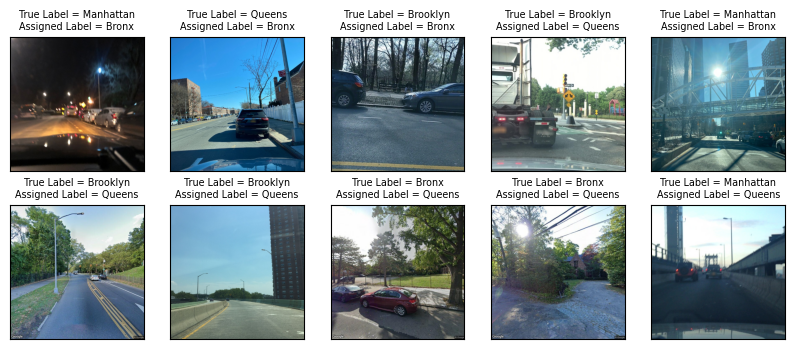

In [27]:
model.load_state_dict(torch.load('model_weights_resnet_50_5.pth'))
Testing(val_loader, model, transforms)

In [45]:
# Loading the architecture
arch = 'resnet18'

# load the pre-trained weights
model_file = '%s_places365.pth.tar' % arch
if not os.access(model_file, os.W_OK):
    weight_url = 'http://places2.csail.mit.edu/models_places365/' + model_file
    os.system('wget ' + weight_url)

model = models.__dict__[arch](num_classes=365)
checkpoint = torch.load(model_file, map_location=lambda storage, loc: storage)
state_dict = {str.replace(k,'module.',''): v for k,v in checkpoint['state_dict'].items()}
model.load_state_dict(state_dict)
transforms_places = transforms.Compose([
                    transforms.Resize(256),
                    transforms.CenterCrop(224),])

In [33]:
TransferLearning(model, transforms_places, train_loader, val_loader, 0.01, 5, replace = True, tune = False, dataset = 'places', name = 'resnet18_places_final')

Epoch 1
-------------------------------
Training Loss: 1.372724
Validation Loss: 1.315178 
Validation Accuracy: 44.3% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 1.276602
Validation Loss: 1.258968 
Validation Accuracy: 46.8% (Model Checkpoint)

Epoch 3
-------------------------------
Training Loss: 1.245607
Validation Loss: 1.240220 
Validation Accuracy: 47.9% (Model Checkpoint)

Epoch 4
-------------------------------
Training Loss: 1.226721
Validation Loss: 1.223404 
Validation Accuracy: 48.8% (Model Checkpoint)

Epoch 5
-------------------------------
Training Loss: 1.214531
Validation Loss: 1.214692 
Validation Accuracy: 49.0% (Model Checkpoint)

Training Done!


In [41]:
model.load_state_dict(torch.load('model_weights_resnet18_places_final_5.pth'))
TransferLearning(model, transforms_places, train_loader, val_loader, 0.01, 5, replace = False, tune = True, dataset = 'places', name = 'resnet18_places_final_tune')

Epoch 1
-------------------------------
Training Loss: 1.143450
Validation Loss: 1.096927 
Validation Accuracy: 54.7% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 1.015135
Validation Loss: 1.038711 
Validation Accuracy: 57.7% (Model Checkpoint)

Epoch 3
-------------------------------
Training Loss: 0.912639
Validation Loss: 0.990837 
Validation Accuracy: 59.3% (Model Checkpoint)

Epoch 4
-------------------------------
Training Loss: 0.816580
Validation Loss: 0.961522 
Validation Accuracy: 61.5% (Model Checkpoint)

Epoch 5
-------------------------------
Training Loss: 0.715985
Validation Loss: 0.944855 
Validation Accuracy: 62.1% (Model Checkpoint)

Training Done!


--------------------
Test Accuracy: 62.1%



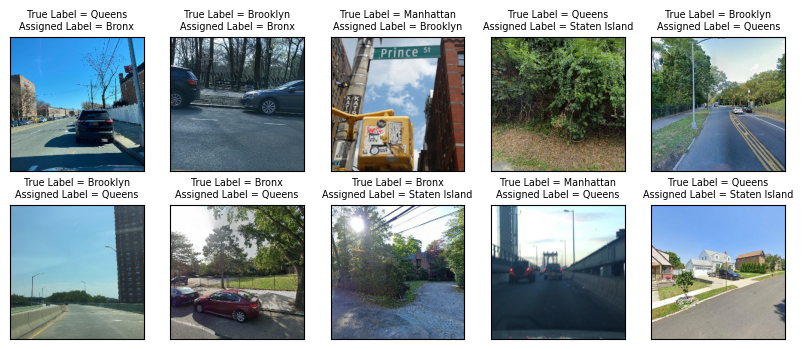

In [56]:
model.load_state_dict(torch.load('model_weights_resnet18_places_final_tune_5.pth'))
Testing(val_loader, model, transforms_places, dataset = 'places')

In [60]:
from torchvision.models import resnet18, ResNet18_Weights
weights = ResNet18_Weights.IMAGENET1K_V1
transforms = weights.transforms(antialias=True)
model = resnet18(weights=weights)
TransferLearning(model, transforms, train_loader, val_loader, 0.01, 5, replace = True, tune = True, name = 'resnet18_adam', opt = 'adam')

Epoch 1
-------------------------------
Training Loss: 1.596444
Validation Loss: 1.932205 
Validation Accuracy: 27.5% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 1.411923
Validation Loss: 1.368290 
Validation Accuracy: 40.4% (Model Checkpoint)

Epoch 3
-------------------------------
Training Loss: 1.342773
Validation Loss: 1.380783 
Validation Accuracy: 39.3%

Epoch 4
-------------------------------
Training Loss: 1.299299
Validation Loss: 1.330978 
Validation Accuracy: 43.3% (Model Checkpoint)

Epoch 5
-------------------------------
Training Loss: 1.246123
Validation Loss: 1.267449 
Validation Accuracy: 46.2% (Model Checkpoint)

Training Done!


In [66]:
TransferLearning(model, transforms, train_loader, val_loader, 0.01, 5, replace = False, tune = True, name = 'resnet18_adam', opt = 'adam')

Epoch 1
-------------------------------
Training Loss: 1.219574
Validation Loss: 1.212908 
Validation Accuracy: 49.0% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 1.268381
Validation Loss: 1.316538 
Validation Accuracy: 44.0%

Epoch 3
-------------------------------
Training Loss: 1.207842
Validation Loss: 1.231992 
Validation Accuracy: 47.4%

Epoch 4
-------------------------------
Training Loss: 1.137206
Validation Loss: 1.191868 
Validation Accuracy: 50.5% (Model Checkpoint)

Epoch 5
-------------------------------


KeyboardInterrupt: 

In [67]:
model.load_state_dict(torch.load('weights_resnet18_adam.pth'))
TransferLearning(model, transforms, train_loader, val_loader, 0.001, 5, replace = False, tune = True, name = 'resnet18_adam', opt = 'adam')

Epoch 1
-------------------------------
Training Loss: 1.036859
Validation Loss: 1.084510 
Validation Accuracy: 55.8% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 1.002761
Validation Loss: 1.079504 
Validation Accuracy: 55.6% (Model Checkpoint)

Epoch 3
-------------------------------
Training Loss: 0.980407
Early Stopping - Epoch: 3
Training Done!


In [13]:
from torchvision.models import resnet18, ResNet18_Weights
weights = ResNet18_Weights.IMAGENET1K_V1
transforms = weights.transforms(antialias=True)
model = resnet18(weights=weights)
num_ftrs = model.fc.in_features    
model.fc = nn.Linear(num_ftrs, 5)
model.to(device)
model.load_state_dict(torch.load('weights_resnet18_adam.pth'))

<All keys matched successfully>

In [14]:
TransferLearning(model, transforms, train_loader, val_loader, 0.001, 10, replace = False, tune = True, name = 'resnet18_adam', opt = 'adam')

Epoch 1
-------------------------------
Training Loss: 0.980626
Validation Loss: 1.073865 
Validation Accuracy: 56.6% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 0.959994
Early Stopping - Epoch: 2
Training Done!


--------------------
Test Accuracy: 55.6%



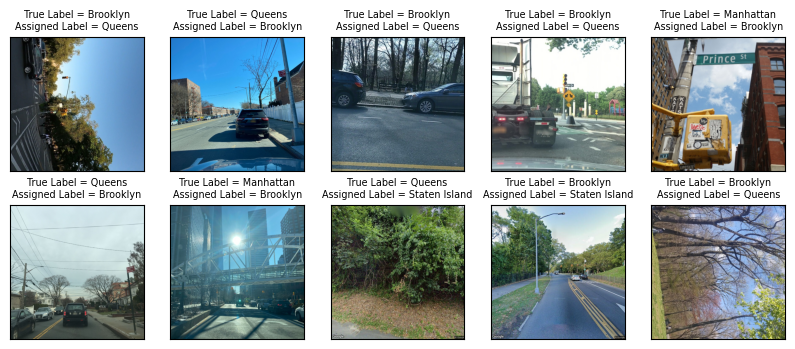

In [38]:
Testing(val_loader, model, transforms, dataset='imagenet')

In [15]:
from torchvision.models import regnet_y_1_6gf, RegNet_Y_1_6GF_Weights
weights = RegNet_Y_1_6GF_Weights.IMAGENET1K_V1
transforms = weights.transforms(antialias=True)
model = regnet_y_1_6gf(weights=weights)
TransferLearning(model, transforms, train_loader, val_loader, 0.01, 10, replace = True, tune = True, name = 'regnet_adam', opt = 'adam')

Epoch 1
-------------------------------
Training Loss: 1.547529
Validation Loss: 1.475665 
Validation Accuracy: 37.1% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 1.402404
Validation Loss: 1.376782 
Validation Accuracy: 40.4% (Model Checkpoint)

Epoch 3
-------------------------------
Training Loss: 1.349037
Validation Loss: 1.343308 
Validation Accuracy: 41.4% (Model Checkpoint)

Epoch 4
-------------------------------
Training Loss: 1.303337
Validation Loss: 1.444073 
Validation Accuracy: 43.9%

Epoch 5
-------------------------------
Training Loss: 1.254154
Validation Loss: 1.323513 
Validation Accuracy: 45.6% (Model Checkpoint)

Epoch 6
-------------------------------
Training Loss: 1.216088
Validation Loss: 1.271754 
Validation Accuracy: 47.5% (Model Checkpoint)

Epoch 7
-------------------------------
Training Loss: 1.174449
Validation Loss: 1.213258 
Validation Accuracy: 51.2% (Model Checkpoint)

Epoch 8
-------------------------------
Training Loss

In [16]:
TransferLearning(model, transforms, train_loader, val_loader, 0.01, 10, replace = False, tune = True, name = 'regnet18_adam', opt = 'adam')

Epoch 1
-------------------------------
Training Loss: 1.065303
Validation Loss: 1.166218 
Validation Accuracy: 52.0% (Model Checkpoint)

Epoch 2
-------------------------------
Training Loss: 1.034147
Validation Loss: 1.186758 
Validation Accuracy: 52.4%

Epoch 3
-------------------------------
Training Loss: 1.000033
Validation Loss: 1.129403 
Validation Accuracy: 53.6% (Model Checkpoint)

Epoch 4
-------------------------------
Training Loss: 0.977924
Validation Loss: 1.099010 
Validation Accuracy: 55.9% (Model Checkpoint)

Epoch 5
-------------------------------
Training Loss: 0.951322
Validation Loss: 1.125419 
Validation Accuracy: 55.9%

Epoch 6
-------------------------------
Training Loss: 0.926643
Validation Loss: 1.056678 
Validation Accuracy: 56.2% (Model Checkpoint)

Epoch 7
-------------------------------


KeyboardInterrupt: 

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
weights = ResNet50_Weights.IMAGENET1K_V1
transforms = weights.transforms(antialias=True)
model = resnet50(weights=weights)
TransferLearning(model, transforms, train_loader, val_loader, 0.01, 10, replace = True, tune = True, name = 'resnet50_adam', opt = 'adam')

In [ ]:
model = models.__dict__[arch](num_classes=365)
TransferLearning(model, transforms_places, train_loader, val_loader, 0.01, 10, replace = True, tune = False, dataset = 'places', name = 'resnet18_places_adam')

## Custom Model

In [94]:
model = create_benchmark_model()
model_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224)
])

In [95]:
TransferLearning(model, model_transforms, train_loader, val_loader, lr=0.001, epochs=5, replace=False, tune=True, dataset="places", name="custom", opt="adam")

Epoch 1
-------------------------------
0 / 310
1 / 310
2 / 310


KeyboardInterrupt: 

## Random Choices with Prior Distribution

In [86]:
priors = train_df.groupby("borough")["id"].count().sort_index()
priors /= np.sum(priors)
priors = priors.to_numpy()
np.save("./models/priors.npy", priors)
print(priors)

[0.1330062  0.23221204 0.13252195 0.37219137 0.13006844]
